**What is Data Analysis**


Data analysis is the process of inspecting, cleaning, transforming, and interpreting data to discover meaningful insights, patterns, and trends. It is a critical step in extracting valuable information from raw data, and it plays a central role in various fields, including business, science, finance, healthcare, and social sciences.

Steps Involved in Data Analysis

Data Collection

Data Cleaning

Data Transformation

Exploratory Data analysis

Statistical Analysis

Data Visualization

Interpretation and Inference

Reporting

Continuous Improvement




For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is ``pandas``?

* Pandas can be thought of as NumPy arrays with labels for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...


## Key features

* Fast, easy and flexible input/output for a lot of different data formats
* Working with missing data (`.dropna()`, `pd.isnull()`)
* Merging and joining (`concat`, `join`)
* Grouping: `groupby` functionality
* Reshaping (`stack`, `pivot`)
* Powerful time series manipulation (resampling, timezones, ..)
* Easy plotting

# Basic data structures

Pandas does this through two fundamental object types, both built upon NumPy arrays: the ``Series`` object, and the ``DataFrame`` object.

## Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created much as a NumPy array is created:

In [ ]:
import pandas as pd
import numpy as np
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

### Attributes of a Series: `index` and `values`

The series has a built-in concept of an **index**, which by default is the numbers *0* through *N - 1*

In [ ]:
s.index

RangeIndex(start=0, stop=4, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [ ]:
s.values

array([0.1, 0.2, 0.3, 0.4])

We can access series values via the index, just like for NumPy arrays:

In [ ]:
s[0]

0.1

Unlike the NumPy array, though, this index can be something other than integers:

In [ ]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int64

In [ ]:
s2['c']

2

In this way, a ``Series`` object can be thought of as similar to an ordered dictionary mapping one typed value to another typed value:

In [ ]:
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 'United Kingdom': 64.9, 'Netherlands': 16.9})
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

In [ ]:
population['France']

64.3

but with the power of numpy arrays:

In [ ]:
population * 1000

Germany           81300.0
Belgium           11300.0
France            64300.0
United Kingdom    64900.0
Netherlands       16900.0
dtype: float64

We can index or slice the populations as expected:

In [ ]:
population['Belgium']

11.3

In [ ]:
population['Belgium':'Germany']

Series([], dtype: float64)

Many things you can do with numpy arrays, can also be applied on objects.

Fancy indexing, like indexing with a list or boolean indexing:

In [ ]:
population[['France', 'Netherlands']]

France         64.3
Netherlands    16.9
dtype: float64

In [ ]:
population[population > 20]

Germany           81.3
France            64.3
United Kingdom    64.9
dtype: float64

Element-wise operations:

In [ ]:
population / 100

Germany           0.813
Belgium           0.113
France            0.643
United Kingdom    0.649
Netherlands       0.169
dtype: float64

A range of methods:

In [ ]:
population.mean()

47.739999999999995

### Alignment!

Only, pay attention to **alignment**: operations between series will align on the index:  

In [ ]:
s1 = population[['Belgium', 'France']]
s2 = population[['France', 'Germany']]

In [ ]:
s1

Belgium    11.3
France     64.3
dtype: float64

In [ ]:
s2

France     64.3
Germany    81.3
dtype: float64

In [ ]:
s1 + s2

Belgium      NaN
France     128.6
Germany      NaN
dtype: float64

## DataFrames: Multi-dimensional Data

A DataFrame is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.





One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.



In [ ]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [ ]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
countries.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

To check the data types of the different columns:

In [ ]:
countries.dtypes

country        object
population    float64
area            int64
capital        object
dtype: object

An overview of that information can be given with the `info()` method:

In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     5 non-null      object 
 1   population  5 non-null      float64
 2   area        5 non-null      int64  
 3   capital     5 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 288.0+ bytes


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [ ]:
countries.values

array([['Belgium', 11.3, 30510, 'Brussels'],
       ['France', 64.3, 671308, 'Paris'],
       ['Germany', 81.3, 357050, 'Berlin'],
       ['Netherlands', 16.9, 41526, 'Amsterdam'],
       ['United Kingdom', 64.9, 244820, 'London']], dtype=object)

If we don't like what the index looks like, we can reset it and set one of our columns:

In [ ]:
countries = countries.set_index('country')
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


To access a Series representing a column in the data, use typical indexing syntax:

In [ ]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

As you play around with DataFrames, you'll notice that many operations which work on NumPy arrays will also work on dataframes.

Let's compute density of each country:

In [ ]:
countries['population']*1000000 / countries['area']

country
Belgium           370.370370
France             95.783158
Germany           227.699202
Netherlands       406.973944
United Kingdom    265.092721
dtype: float64

Adding a new column to the dataframe is very simple:

In [ ]:
countries['density'] = countries['population']*1000000 / countries['area']
countries['density']

country
Belgium           370.370370
France             95.783158
Germany           227.699202
Netherlands       406.973944
United Kingdom    265.092721
Name: density, dtype: float64

We can use masking to select certain data:

In [ ]:
countries[countries['density'] > 300]

,population,area,capital,density
country,,,,
Belgium,11.3,30510,Brussels,370.370370
Netherlands,16.9,41526,Amsterdam,406.973944


And we can do things like sorting the items in the array, and indexing to take the first two rows:

In [ ]:
countries.sort_values(by='density', ascending=False)

,population,area,capital,density
country,,,,
Netherlands,16.9,41526,Amsterdam,406.973944
Belgium,11.3,30510,Brussels,370.370370
United Kingdom,64.9,244820,London,265.092721
Germany,81.3,357050,Berlin,227.699202
France,64.3,671308,Paris,95.783158


One useful method to use is the ``describe`` method, which computes summary statistics for each column:

In [ ]:
countries.describe()


,population,area,density
count,5.000000,5.000000,5.000000
mean,47.740000,269042.800000,273.183879
std,31.519645,264012.827994,123.440607
min,11.300000,30510.000000,95.783158
25%,16.900000,41526.000000,227.699202
50%,64.300000,244820.000000,265.092721
75%,64.900000,357050.000000,370.370370
max,81.300000,671308.000000,406.973944


<Axes: xlabel='country'>

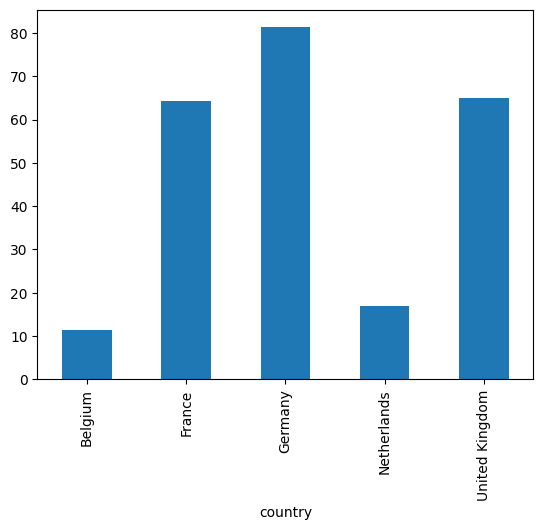

In [ ]:
countries['population'].plot(kind='bar')

<Axes: xlabel='population', ylabel='area'>

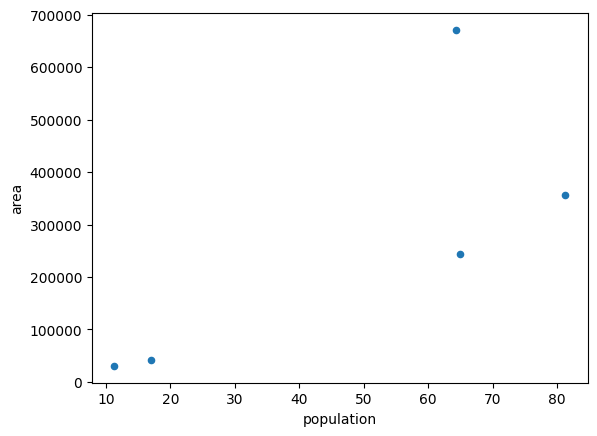

In [ ]:
countries.plot(kind='scatter', x='population', y='area')

The available plotting types: ‘line’ (default), ‘bar’, ‘barh’, ‘hist’, ‘box’ , ‘kde’, ‘area’, ‘pie’, ‘scatter’, ‘hexbin’.





One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. We now have to distuinguish between:

- selection by label
- selection by position.

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [ ]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

or multiple columns:

But, slicing accesses the rows:

In [ ]:
countries['France':'Netherlands']

,population,area,capital,density
country,,,,
France,64.3,671308,Paris,95.783158
Germany,81.3,357050,Berlin,227.699202
Netherlands,16.9,41526,Amsterdam,406.973944


For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [ ]:
countries.loc['Germany', 'area']

357050

In [ ]:
countries.loc['France':'Germany', :]

,population,area,capital,density
country,,,,
France,64.3,671308,Paris,95.783158
Germany,81.3,357050,Berlin,227.699202


In [ ]:
countries.loc[countries['density']>300, ['capital', 'population']]

,capital,population
country,,
Belgium,Brussels,11.3
Netherlands,Amsterdam,16.9


Selecting by position with `iloc` works similar as indexing numpy arrays:

In [ ]:
countries.iloc[0:2,1:3]

,area,capital
country,,
Belgium,30510,Brussels
France,671308,Paris


The different indexing methods can also be used to assign data:

In [ ]:
countries.loc['Belgium':'Germany', 'population'] = 10

In [ ]:
countries

,population,area,capital,density
country,,,,
Belgium,10.0,30510,Brussels,370.370370
France,10.0,671308,Paris,95.783158
Germany,10.0,357050,Berlin,227.699202
Netherlands,16.9,41526,Amsterdam,406.973944
United Kingdom,64.9,244820,London,265.092721


##Data Preprocessing and Matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("/content/gas_prices.csv")
print(data)


    Year  Australia  Canada  France  Germany  Italy  Japan  Mexico  \
0   1990        NaN    1.87    3.63     2.65   4.59   3.16    1.00   
1   1991       1.96    1.92    3.45     2.90   4.50   3.46    1.30   
2   1992       1.89    1.73    3.56     3.27   4.53   3.58    1.50   
3   1993       1.73    1.57    3.41     3.07   3.68   4.16    1.56   
4   1994       1.84    1.45    3.59     3.52   3.70   4.36    1.48   
5   1995       1.95    1.53    4.26     3.96   4.00   4.43    1.11   
6   1996       2.12    1.61    4.41     3.94   4.39   3.64    1.25   
7   1997       2.05    1.62    4.00     3.53   4.07   3.26    1.47   
8   1998       1.63    1.38    3.87     3.34   3.84   2.82    1.49   
9   1999       1.72    1.52    3.85     3.42   3.87   3.27    1.79   
10  2000       1.94    1.86    3.80     3.45   3.77   3.65    2.01   
11  2001       1.71    1.72    3.51     3.40   3.57   3.27    2.20   
12  2002       1.76    1.69    3.62     3.67   3.74   3.15    2.24   
13  2003       2.19 

In [ ]:
data.describe()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
count,19.000000,18.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,1999.000000,2.348889,2.086842,4.407895,4.224737,4.645789,3.820526,1.781579,3.835789,4.392632,1.592105
std,5.627314,0.845931,0.786618,1.167531,1.425749,1.146610,0.696615,0.462148,1.226170,1.455170,0.663355
min,1990.000000,1.630000,1.380000,3.410000,2.650000,3.570000,2.820000,1.000000,2.050000,2.820000,1.060000
25%,1994.500000,1.780000,1.590000,3.605000,3.370000,3.805000,3.270000,1.475000,2.910000,3.135000,1.145000
50%,1999.000000,1.955000,1.730000,3.870000,3.530000,4.390000,3.640000,1.790000,3.760000,4.130000,1.230000
75%,2003.500000,2.587500,2.180000,4.700000,4.915000,4.940000,4.320000,2.210000,4.345000,5.130000,1.735000
max,2008.000000,4.450000,4.080000,7.510000,7.750000,7.630000,5.740000,2.450000,6.210000,7.420000,3.270000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         19 non-null     int64  
 1   Australia    18 non-null     float64
 2   Canada       19 non-null     float64
 3   France       19 non-null     float64
 4   Germany      19 non-null     float64
 5   Italy        19 non-null     float64
 6   Japan        19 non-null     float64
 7   Mexico       19 non-null     float64
 8   South Korea  19 non-null     float64
 9   UK           19 non-null     float64
 10  USA          19 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 1.8 KB


In [ ]:
data.isnull().sum()

Year           0
Australia      1
Canada         0
France         0
Germany        0
Italy          0
Japan          0
Mexico         0
South Korea    0
UK             0
USA            0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data.iloc[:, 1:8])
data.iloc[:, 1:8]= imputer.transform(data.iloc[:, 1:8])

In [ ]:
data.isnull().sum()

Year           0
Australia      0
Canada         0
France         0
Germany        0
Italy          0
Japan          0
Mexico         0
South Korea    0
UK             0
USA            0
dtype: int64

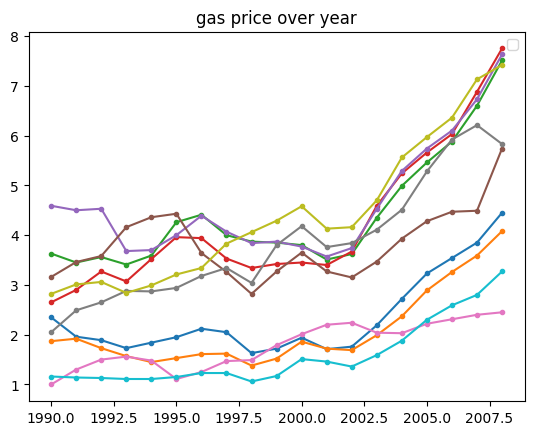

In [ ]:
plt.title('gas price over year')
for country in data:
    if country != 'Year':
        plt.plot(data.Year,data[country],marker='.')

plt.xlabel="Year"
plt.ylabel="US Doller"
plt.legend()
plt.show()